In [1]:
# HPC
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'
ds_bm5  = xr.open_dataset(dataPath + 'BedMachineGreenland-v5.nc')

# Convert metres to kms
ds_bm5['x'] = ds_bm5['x']*0.001
ds_bm5['y'] = ds_bm5['y']*0.001
xModel40       = np.arange(-72.,97.,4.0)*10
yModel40       = np.arange(-345.,-56.,4.0)*10

ds_bm5_40kms = xr.open_dataset(dataPath + 'bm5_data_40kms.nc')
ds_age_40kms = xr.open_dataset(dataPath + 'age_data_40kms.nc')

modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_13point5CS_spinup_0ka/'
ds_model = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_13point5CS_spinup_0ka0011.nc')

V_model = np.sum(ds_model["H"].data*ds_model["cell_area"].data)
V_data = np.sum(ds_bm5_40kms["H"].data*(ds_bm5_40kms["H"].data >= 0.0)*ds_model["cell_area"].data)

V_model, V_data

(2976619000000000.0, 3010602000000000.0)

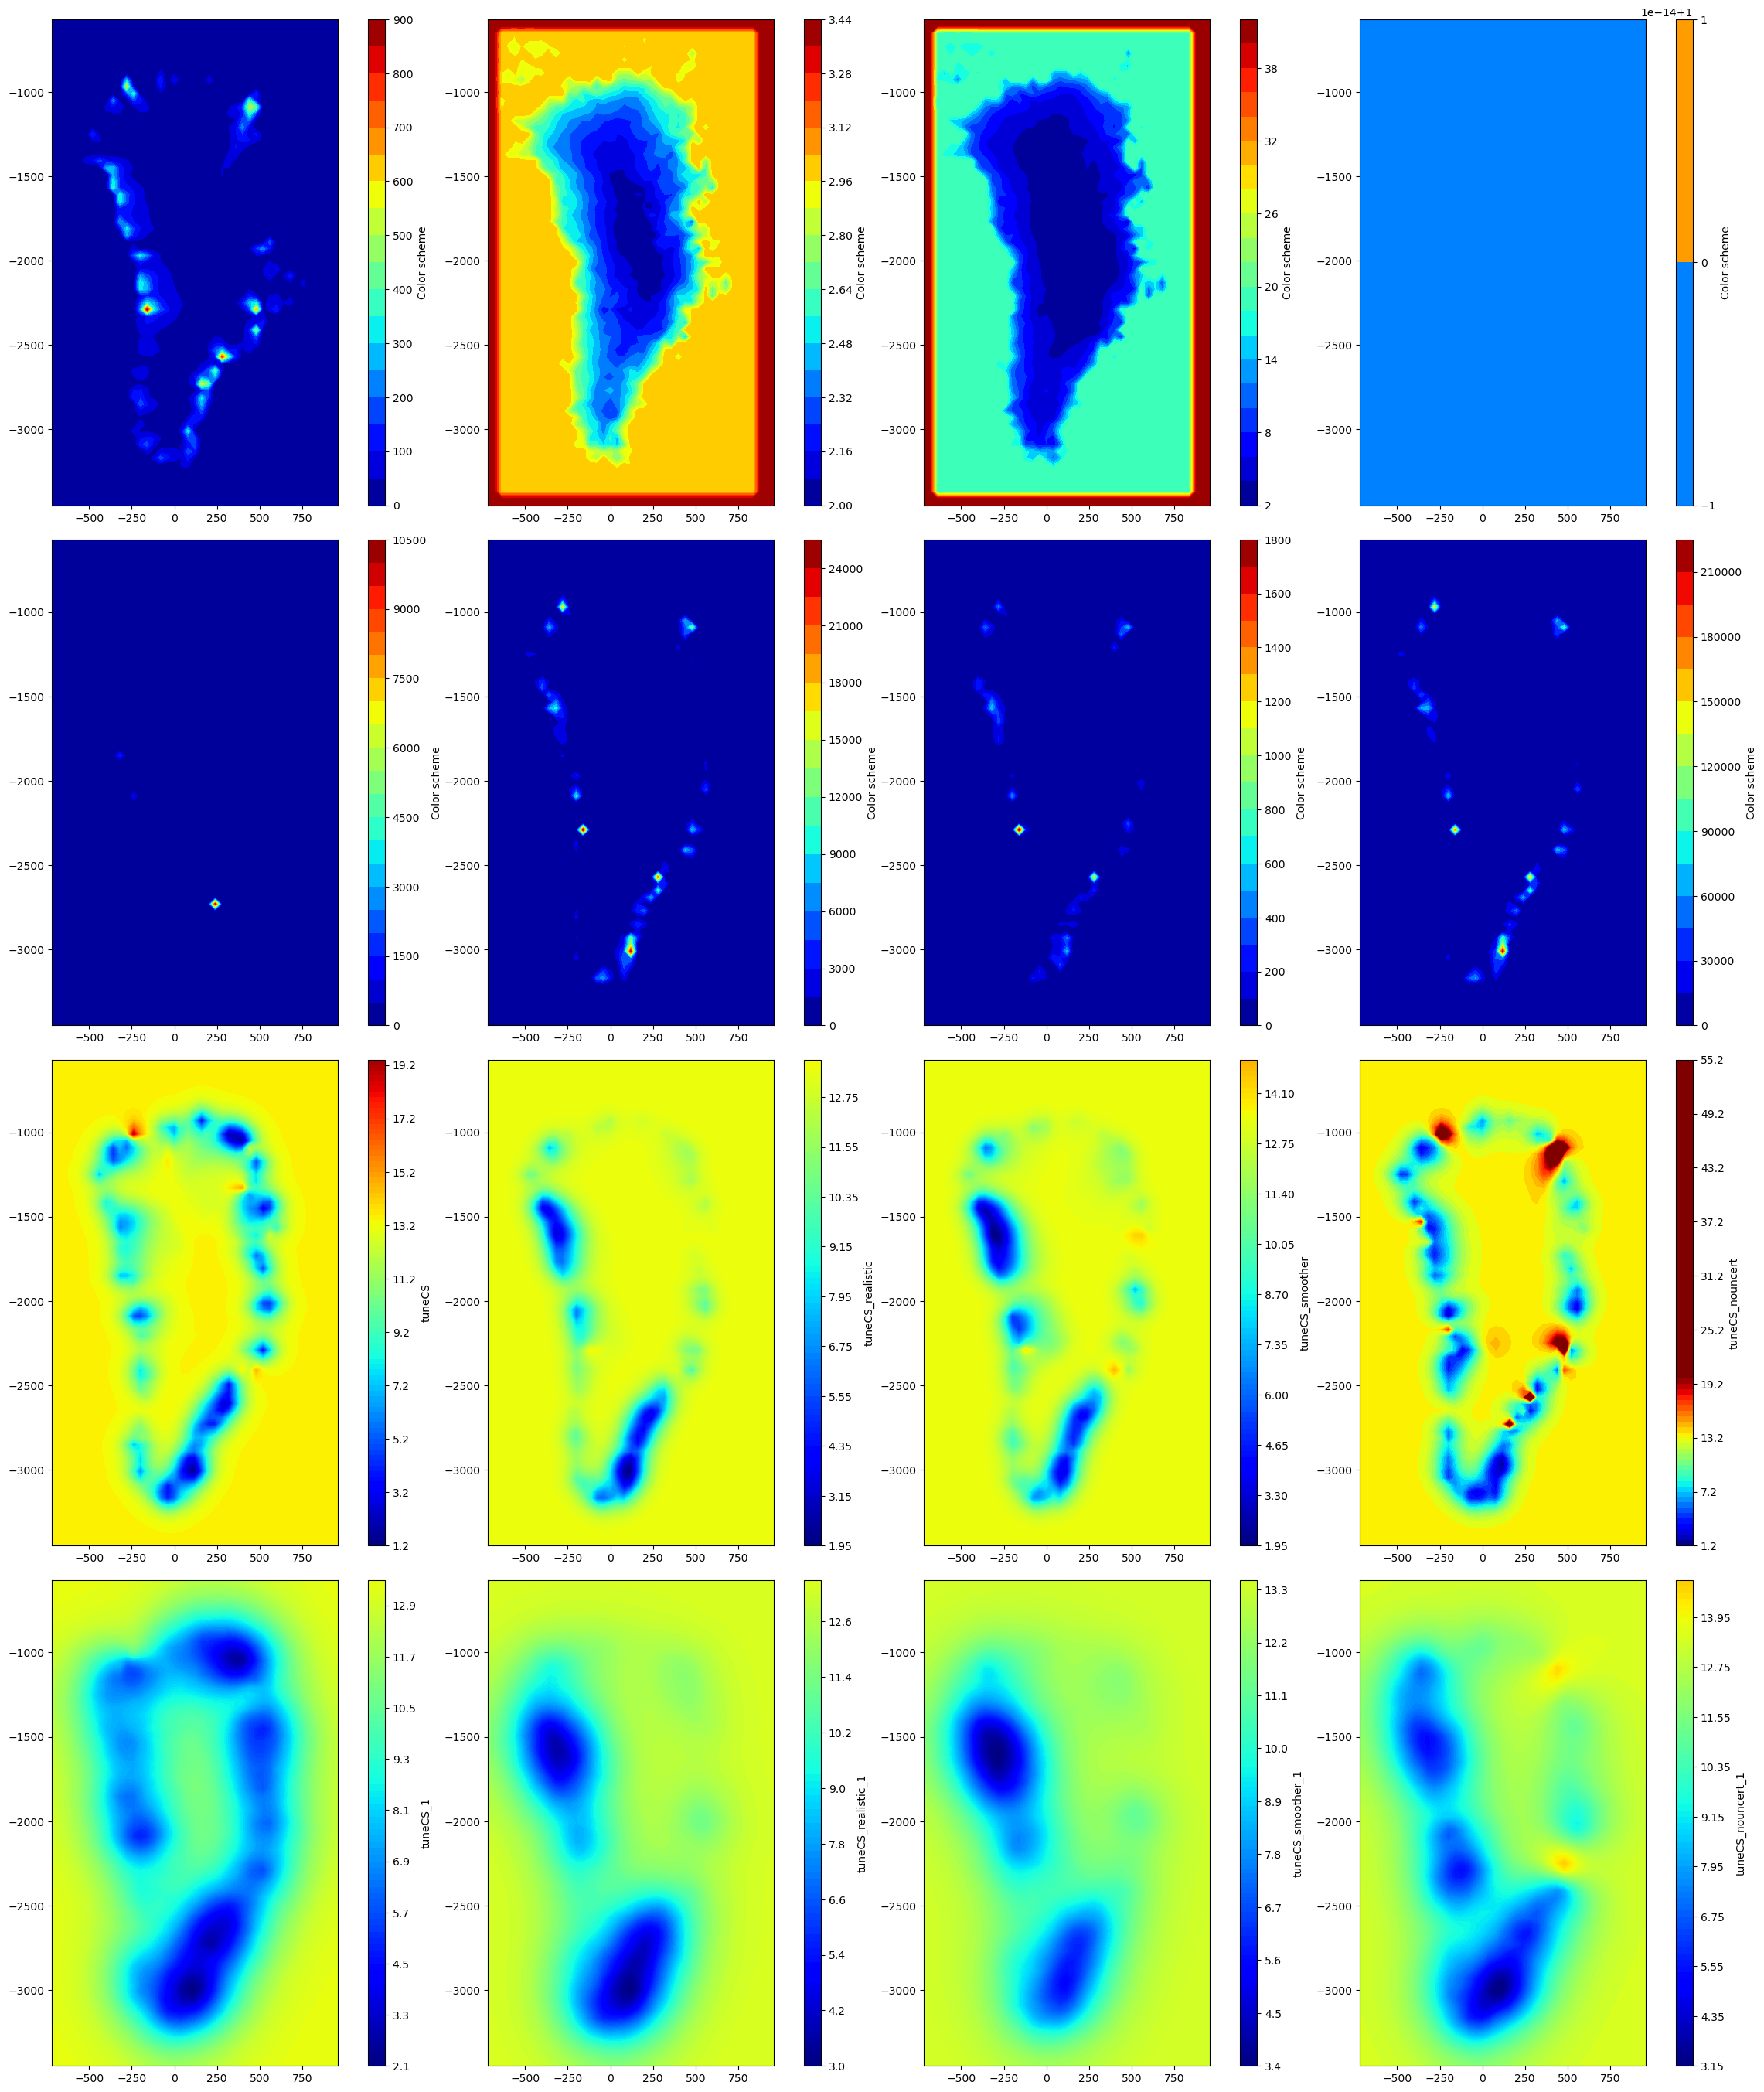

In [3]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_tuneCS = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneCS_1 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_1/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneCS_realistic = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_realistic/inexact_gn_hessian_cg/state_GNHessCG_iter_8.nc")
ds_tuneCS_realistic_1 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_realistic_1/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneCS_smoother = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_smoother/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneCS_smoother_1 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_smoother_1/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneCS_nouncert = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_nouncert/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneCS_nouncert_1 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_nouncert_1/inexact_gn_hessian_cg/state_GNHessCG_iter_3.nc")

ds_surfvel_data_40km = xr.open_dataset(dataPath + 'surfvel_data_40kms.nc')
ds_surfvel_model_40km = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp/grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp0007.nc')

vs_data = ds_surfvel_data_40km["vs"].data
vs_unc_data = ds_surfvel_data_40km['vs_uncert'].data
vs_unc_real_data = ds_surfvel_data_40km['vs_uncert_realistic'].data
vs_unc_real_smoother_data = ds_surfvel_data_40km['vs_uncert_realistic_smoother'].data
vs_unc_real_smoothest_data = ds_surfvel_data_40km['vs_uncert_realistic_smoothest'].data
vs_model = (ds_surfvel_model_40km['vx_s_g'].data**2 + ds_surfvel_model_40km['vy_s_g'].data**2)**0.5

costs = 0.5*(vs_data - vs_model)**2
cost = np.sum(costs)

costs_weighted = 0.5*(vs_data - vs_model)**2/vs_unc_data**2
cost_weighted = np.sum(costs_weighted)

costs_real_weighted = 0.5*(vs_data - vs_model)**2/vs_unc_real_data**2
cost_real_weighted = np.sum(costs_real_weighted)

costs_real_smoother_weighted = 0.5*(vs_data - vs_model)**2/vs_unc_real_smoother_data**2
cost_real_smoother_weighted = np.sum(costs_real_smoother_weighted)

n_rows, n_cols = 4, 4
aspect_ratio = len(ds_tuneCS['x'])/len(ds_tuneCS['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.7)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_unc_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_unc_real_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_unc_real_smoother_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 2])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_unc_data*0.0 + 1.0,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 3])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_weighted,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_real_weighted,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_real_smoother_weighted,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 2])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 3])

fancyPlotter.plot_normal(ds_tuneCS['x'], ds_tuneCS['y'], 
                         10**ds_tuneCS["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[2,0], vmax = 20,
                         cbar_label = 'tuneCS')

fancyPlotter.plot_normal(ds_tuneCS_1['x'], ds_tuneCS_1['y'], 
                         10**ds_tuneCS_1["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[3,0], vmax = 20,
                         cbar_label = 'tuneCS_1')

fancyPlotter.plot_normal(ds_tuneCS_realistic['x'], ds_tuneCS_realistic['y'], 
                         10**ds_tuneCS_realistic["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[2,1], vmax = 20,
                         cbar_label = 'tuneCS_realistic')

fancyPlotter.plot_normal(ds_tuneCS_realistic_1['x'], ds_tuneCS_realistic_1['y'], 
                         10**ds_tuneCS_realistic_1["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[3,1], vmax = 20,
                         cbar_label = 'tuneCS_realistic_1')

fancyPlotter.plot_normal(ds_tuneCS_smoother['x'], ds_tuneCS_smoother['y'], 
                         10**ds_tuneCS_smoother["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[2,2], vmax = 20,
                         cbar_label = 'tuneCS_smoother')

fancyPlotter.plot_normal(ds_tuneCS_smoother_1['x'], ds_tuneCS_smoother_1['y'], 
                         10**ds_tuneCS_smoother_1["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[3,2], vmax = 20,
                         cbar_label = 'tuneCS_smoother_1')

fancyPlotter.plot_normal(ds_tuneCS_nouncert['x'], ds_tuneCS_nouncert['y'], 
                         10**ds_tuneCS_nouncert["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[2,3], vmax = 20,
                         cbar_label = 'tuneCS_nouncert')

fancyPlotter.plot_normal(ds_tuneCS_nouncert_1['x'], ds_tuneCS_nouncert_1['y'], 
                         10**ds_tuneCS_nouncert_1["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[3,3], vmax = 20,
                         cbar_label = 'tuneCS_nouncert_1')

plt.tight_layout()

In [4]:
ds_tuneAll_init = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneAll/inexact_gn_hessian_cg/state_GNHessCG_iter_0.nc")
ds_tuneAll = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneAll/inexact_gn_hessian_cg/state_GNHessCG_iter_2.nc")
ds_tuneAll_0 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneAll_0/inexact_gn_hessian_cg/state_GNHessCG_iter_6.nc")
ds_tuneAll_1 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneAll_1/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneAll_2 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneAll_2/inexact_gn_hessian_cg/state_GNHessCG_iter_4.nc")
ds_tuneAll_3 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneAll_3/inexact_gn_hessian_cg/state_GNHessCG_iter_4.nc")
ds_tuneAll_4 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneAll_3/inexact_gn_hessian_cg/state_GNHessCG_iter_9.nc")

for var in ds_tuneAll_init:
    temp_0 = np.nansum(np.abs(ds_tuneAll_0[var].data-ds_tuneAll_init[var].data))/len(ds_tuneAll_init[var].data.flat)
    temp = np.nansum(np.abs(ds_tuneAll[var].data-ds_tuneAll_init[var].data))/len(ds_tuneAll_init[var].data.flat)
    temp_1 = np.nansum(np.abs(ds_tuneAll_1[var].data-ds_tuneAll_init[var].data))/len(ds_tuneAll_init[var].data.flat)
    temp_2 = np.nansum(np.abs(ds_tuneAll_2[var].data-ds_tuneAll_init[var].data))/len(ds_tuneAll_init[var].data.flat)
    temp_3 = np.nansum(np.abs(ds_tuneAll_3[var].data-ds_tuneAll_init[var].data))/len(ds_tuneAll_init[var].data.flat)
    temp_4 = np.nansum(np.abs(ds_tuneAll_4[var].data-ds_tuneAll_init[var].data))/len(ds_tuneAll_init[var].data.flat)
    print(f"{var}, {temp_0:1.4f}, {temp:1.4f}, {temp_1:1.4f}, {temp_2:1.4f}, {temp_3:1.4f}, {temp_4:1.4f}")


xx_c_slide_init, 0.0067, 0.0002, 0.0262, 0.0001, 0.0380, 0.0379
xx_c_dis_da, 0.6086, 0.1688, 0.5799, 0.1590, 0.2709, 0.2735
xx_q_geo, 0.0001, 0.0000, 0.0003, 0.0000, 0.0002, 0.0002
xx_H, 0.0096, 0.0003, 0.0353, 0.0001, 0.0654, 0.0655
xx_gamma_s, 0.0007, 0.0000, 0.0014, 0.0000, 0.0010, 0.0010
xx_s_stat, 0.0911, 0.0254, 0.0183, 0.0260, 0.0072, 0.0072
xx_beta1, 0.0085, 0.0047, 0.0037, 0.0055, 0.0005, 0.0005
xx_beta2, 0.1163, 0.0176, 0.0517, 0.0204, 0.0298, 0.0302
xx_Pmax, 0.0008, 0.0071, 0.0010, 0.0070, 0.0015, 0.0015
xx_mu, 0.0090, 0.0013, 0.0093, 0.0015, 0.0045, 0.0045
xx_RHO_A, 0.5988, 0.2296, 0.6083, 0.2319, 0.3879, 0.3884
xx_time_lag_asth, 0.0750, 0.0582, 0.0321, 0.0643, 0.1123, 0.1111
xx_zs, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000
xx_zl, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000
xx_zl0, 8.1798, 0.3404, 16.9022, 0.1278, 19.4487, 19.4563
xx_zb, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000
xx_temp_c, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000
xx_age_c, 0.0001, 0.0000,

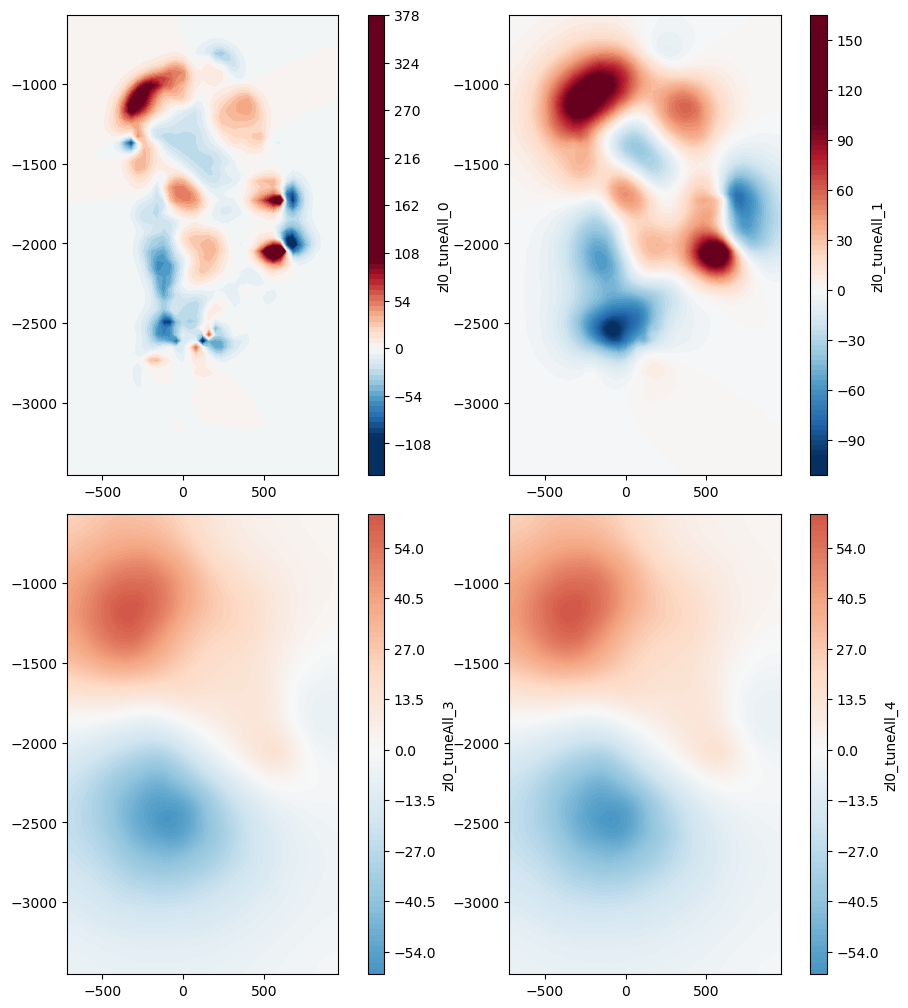

In [5]:
n_rows, n_cols = 2, 2
aspect_ratio = len(ds_tuneCS['x'])/len(ds_tuneCS['y'])
subplot_width = 3
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)
    
fancyPlotter.plot_normal(ds_tuneAll_0['x'], ds_tuneAll_0['y'], 
                         ds_tuneAll_0["xx_zl0"],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,0], vmin = -100, vmax = 100,
                         cbar_label = 'zl0_tuneAll_0')

fancyPlotter.plot_normal(ds_tuneAll_1['x'], ds_tuneAll_1['y'], 
                         ds_tuneAll_1["xx_zl0"],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,1], vmin = -100, vmax = 100,
                         cbar_label = 'zl0_tuneAll_1')

fancyPlotter.plot_normal(ds_tuneAll_3['x'], ds_tuneAll_3['y'], 
                         ds_tuneAll_3["xx_zl0"],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,0], vmin = -100, vmax = 100,
                         cbar_label = 'zl0_tuneAll_3')

fancyPlotter.plot_normal(ds_tuneAll_4['x'], ds_tuneAll_4['y'], 
                         ds_tuneAll_4["xx_zl0"],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,1], vmin = -100, vmax = 100,
                         cbar_label = 'zl0_tuneAll_4')

plt.tight_layout()

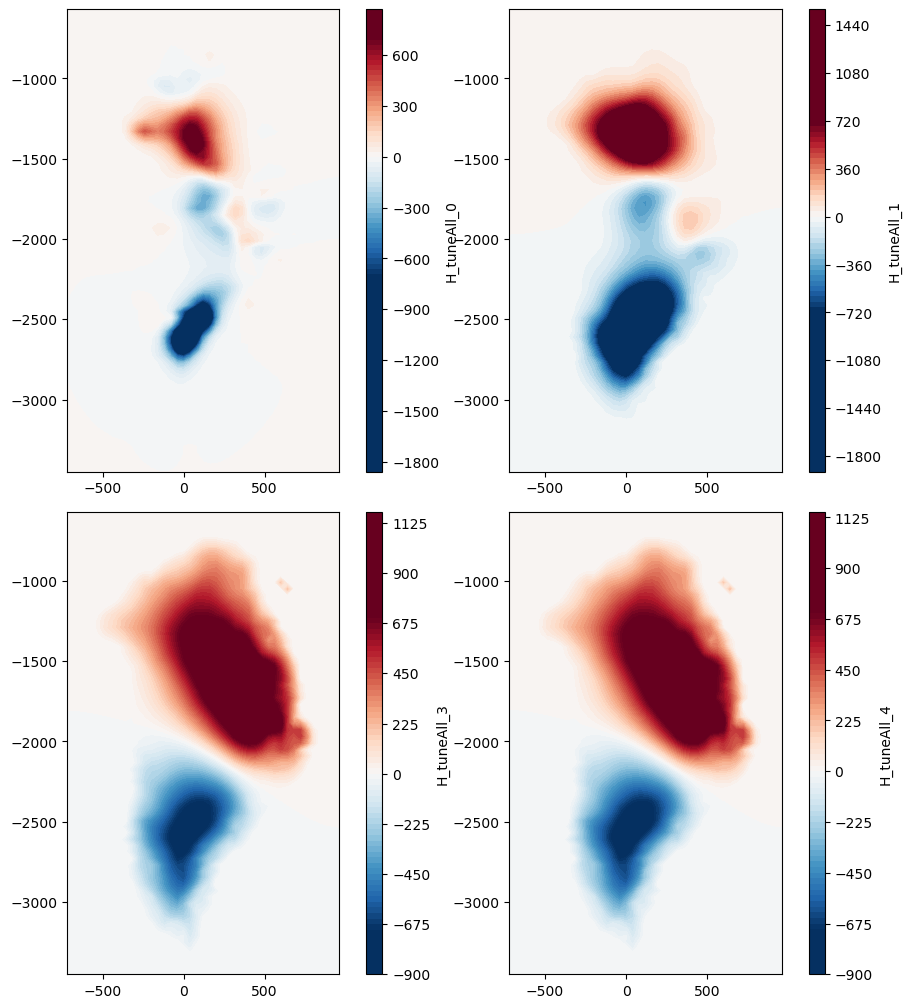

In [6]:
n_rows, n_cols = 2, 2
aspect_ratio = len(ds_tuneCS['x'])/len(ds_tuneCS['y'])
subplot_width = 3
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)
    
fancyPlotter.plot_normal(ds_tuneAll_0['x'], ds_tuneAll_0['y'], 
                         10**ds_tuneAll_0["xx_H"]-10**ds_tuneAll_init["xx_H"],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,0], vmin = -700, vmax = 700,
                         cbar_label = 'H_tuneAll_0')

fancyPlotter.plot_normal(ds_tuneAll_1['x'], ds_tuneAll_1['y'], 
                         10**ds_tuneAll_1["xx_H"]-10**ds_tuneAll_init["xx_H"],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,1], vmin = -700, vmax = 700,
                         cbar_label = 'H_tuneAll_1')

fancyPlotter.plot_normal(ds_tuneAll_3['x'], ds_tuneAll_3['y'], 
                         10**ds_tuneAll_3["xx_H"]-10**ds_tuneAll_init["xx_H"],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,0], vmin = -700, vmax = 700,
                         cbar_label = 'H_tuneAll_3')

fancyPlotter.plot_normal(ds_tuneAll_4['x'], ds_tuneAll_4['y'], 
                         10**ds_tuneAll_4["xx_H"]-10**ds_tuneAll_init["xx_H"],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,1], vmin = -700, vmax = 700,
                         cbar_label = 'H_tuneAll_4')

plt.tight_layout()

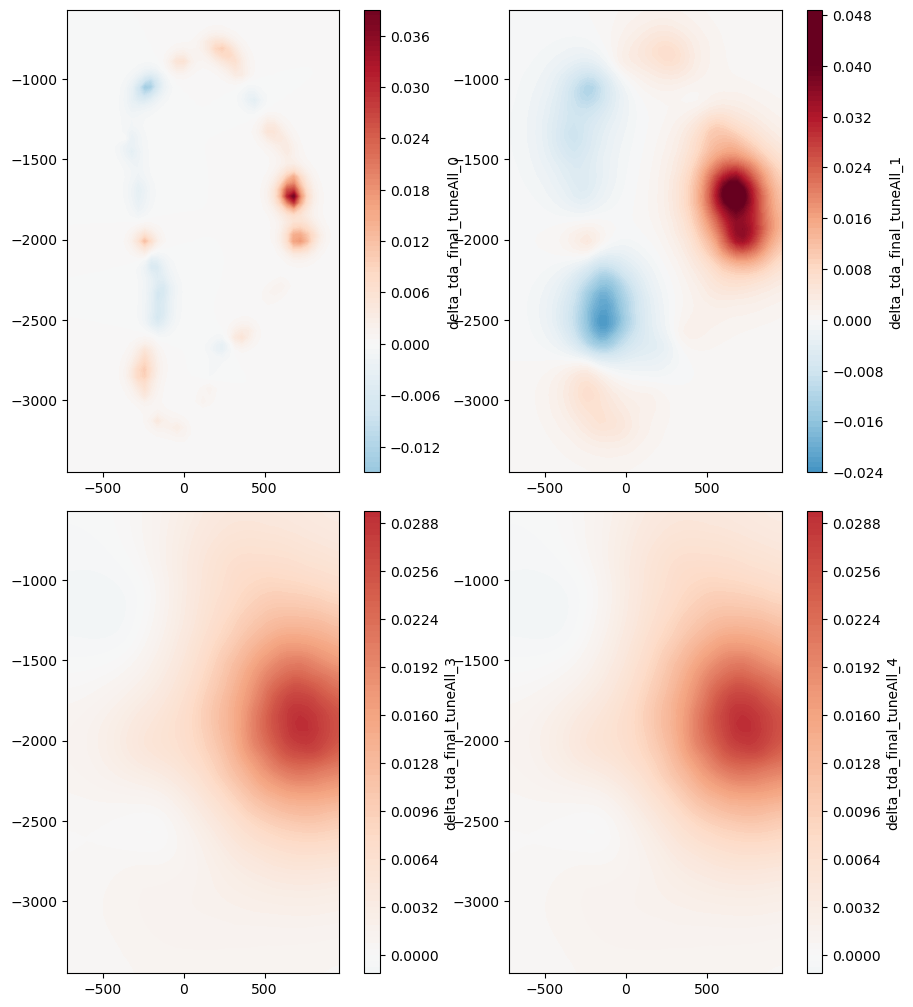

In [7]:
time_idx = -1

n_rows, n_cols = 2, 2
aspect_ratio = len(ds_tuneCS['x'])/len(ds_tuneCS['y'])
subplot_width = 3
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)
    
fancyPlotter.plot_normal(ds_tuneAll_0['x'], ds_tuneAll_0['y'], 
                         ds_tuneAll_0["xx_delta_tda"][time_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,0], vmin = -0.04, vmax = 0.04,
                         cbar_label = 'delta_tda_final_tuneAll_0')

fancyPlotter.plot_normal(ds_tuneAll_1['x'], ds_tuneAll_1['y'], 
                         ds_tuneAll_1["xx_delta_tda"][time_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,1], vmin = -0.04, vmax = 0.04,
                         cbar_label = 'delta_tda_final_tuneAll_1')

fancyPlotter.plot_normal(ds_tuneAll_3['x'], ds_tuneAll_3['y'], 
                         ds_tuneAll_3["xx_delta_tda"][time_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,0], vmin = -0.04, vmax = 0.04,
                         cbar_label = 'delta_tda_final_tuneAll_3')

fancyPlotter.plot_normal(ds_tuneAll_4['x'], ds_tuneAll_4['y'], 
                         ds_tuneAll_4["xx_delta_tda"][time_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,1], vmin = -0.04, vmax = 0.04,
                         cbar_label = 'delta_tda_final_tuneAll_4')

plt.tight_layout()

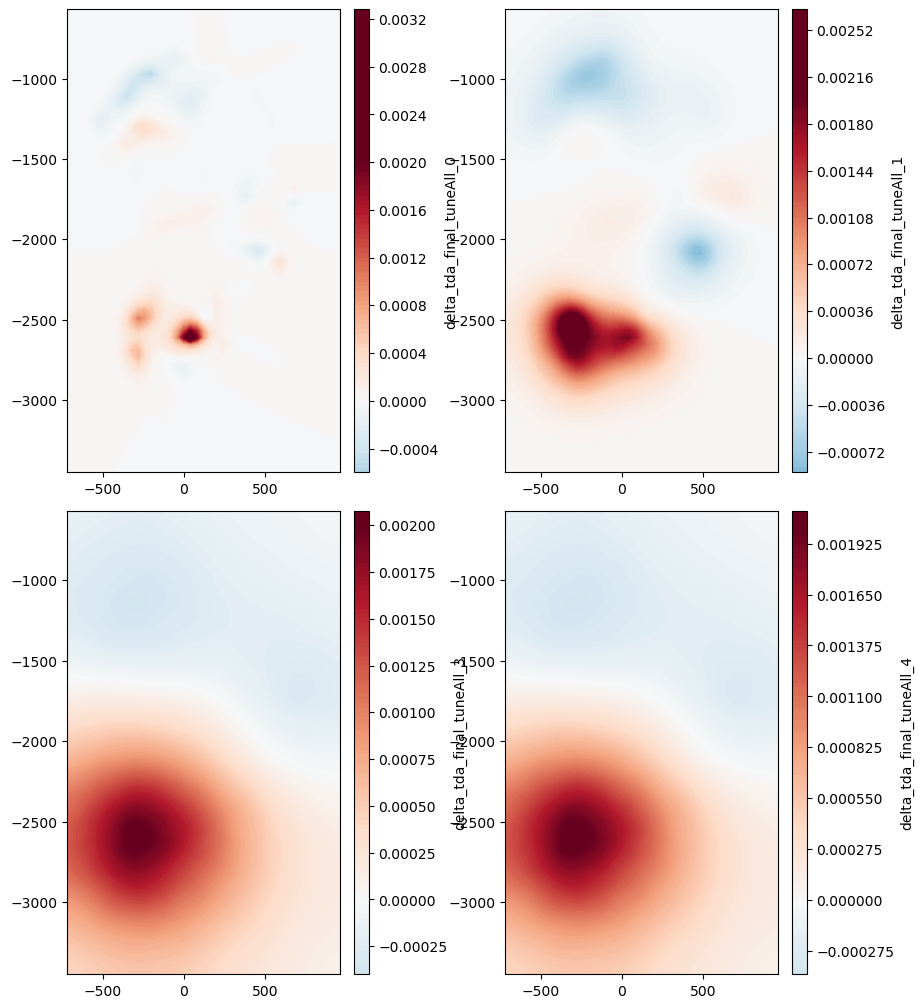

In [8]:
time_idx = 0

n_rows, n_cols = 2, 2
aspect_ratio = len(ds_tuneCS['x'])/len(ds_tuneCS['y'])
subplot_width = 3
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)
    
fancyPlotter.plot_normal(ds_tuneAll_0['x'], ds_tuneAll_0['y'], 
                         ds_tuneAll_0["xx_delta_tda"][time_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,0], vmin = -0.002, vmax = 0.002,
                         cbar_label = 'delta_tda_final_tuneAll_0')

fancyPlotter.plot_normal(ds_tuneAll_1['x'], ds_tuneAll_1['y'], 
                         ds_tuneAll_1["xx_delta_tda"][time_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,1], vmin = -0.002, vmax = 0.002,
                         cbar_label = 'delta_tda_final_tuneAll_1')

fancyPlotter.plot_normal(ds_tuneAll_3['x'], ds_tuneAll_3['y'], 
                         ds_tuneAll_3["xx_delta_tda"][time_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,0], vmin = -0.002, vmax = 0.002,
                         cbar_label = 'delta_tda_final_tuneAll_3')

fancyPlotter.plot_normal(ds_tuneAll_4['x'], ds_tuneAll_4['y'], 
                         ds_tuneAll_4["xx_delta_tda"][time_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,1], vmin = -0.002, vmax = 0.002,
                         cbar_label = 'delta_tda_final_tuneAll_4')

plt.tight_layout()

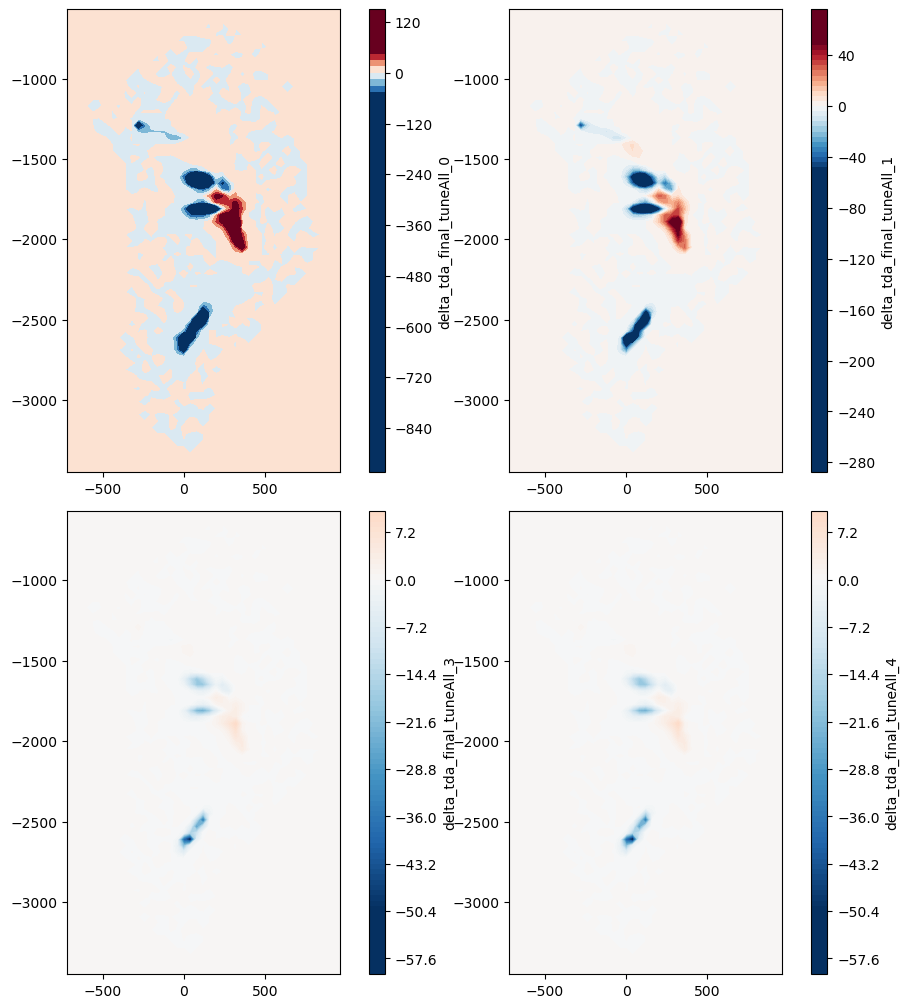

In [9]:
z_idx = 40

n_rows, n_cols = 2, 2
aspect_ratio = len(ds_tuneCS['x'])/len(ds_tuneCS['y'])
subplot_width = 3
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)
    
fancyPlotter.plot_normal(ds_tuneAll_0['x'], ds_tuneAll_0['y'], 
                         10**ds_tuneAll_0["xx_age_c"][z_idx]-10**ds_tuneAll_init["xx_age_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,0], vmin = -50, vmax = 50,
                         cbar_label = 'delta_tda_final_tuneAll_0')

fancyPlotter.plot_normal(ds_tuneAll_1['x'], ds_tuneAll_1['y'], 
                         10**ds_tuneAll_1["xx_age_c"][z_idx]-10**ds_tuneAll_init["xx_age_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,1], vmin = -50, vmax = 50,
                         cbar_label = 'delta_tda_final_tuneAll_1')

fancyPlotter.plot_normal(ds_tuneAll_3['x'], ds_tuneAll_3['y'], 
                         10**ds_tuneAll_3["xx_age_c"][z_idx]-10**ds_tuneAll_init["xx_age_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,0], vmin = -50, vmax = 50,
                         cbar_label = 'delta_tda_final_tuneAll_3')

fancyPlotter.plot_normal(ds_tuneAll_4['x'], ds_tuneAll_4['y'], 
                         10**ds_tuneAll_4["xx_age_c"][z_idx]-10**ds_tuneAll_init["xx_age_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,1], vmin = -50, vmax = 50,
                         cbar_label = 'delta_tda_final_tuneAll_4')

plt.tight_layout()

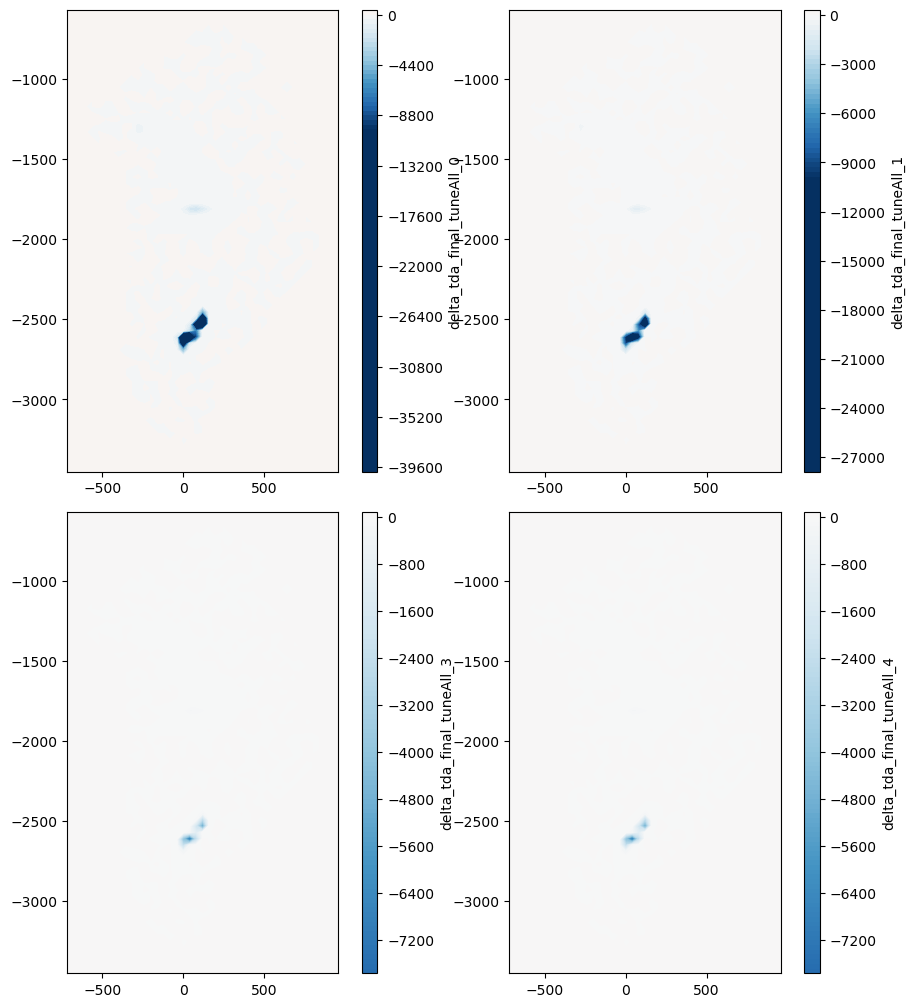

In [10]:
z_idx = 10

n_rows, n_cols = 2, 2
aspect_ratio = len(ds_tuneCS['x'])/len(ds_tuneCS['y'])
subplot_width = 3
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)
    
fancyPlotter.plot_normal(ds_tuneAll_0['x'], ds_tuneAll_0['y'], 
                         10**ds_tuneAll_0["xx_age_c"][z_idx]-10**ds_tuneAll_init["xx_age_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,0], vmin = -10000, vmax = 10000,
                         cbar_label = 'delta_tda_final_tuneAll_0')

fancyPlotter.plot_normal(ds_tuneAll_1['x'], ds_tuneAll_1['y'], 
                         10**ds_tuneAll_1["xx_age_c"][z_idx]-10**ds_tuneAll_init["xx_age_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,1], vmin = -10000, vmax = 10000,
                         cbar_label = 'delta_tda_final_tuneAll_1')

fancyPlotter.plot_normal(ds_tuneAll_3['x'], ds_tuneAll_3['y'], 
                         10**ds_tuneAll_3["xx_age_c"][z_idx]-10**ds_tuneAll_init["xx_age_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,0], vmin = -10000, vmax = 10000,
                         cbar_label = 'delta_tda_final_tuneAll_3')

fancyPlotter.plot_normal(ds_tuneAll_4['x'], ds_tuneAll_4['y'], 
                         10**ds_tuneAll_4["xx_age_c"][z_idx]-10**ds_tuneAll_init["xx_age_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,1], vmin = -10000, vmax = 10000,
                         cbar_label = 'delta_tda_final_tuneAll_4')

plt.tight_layout()

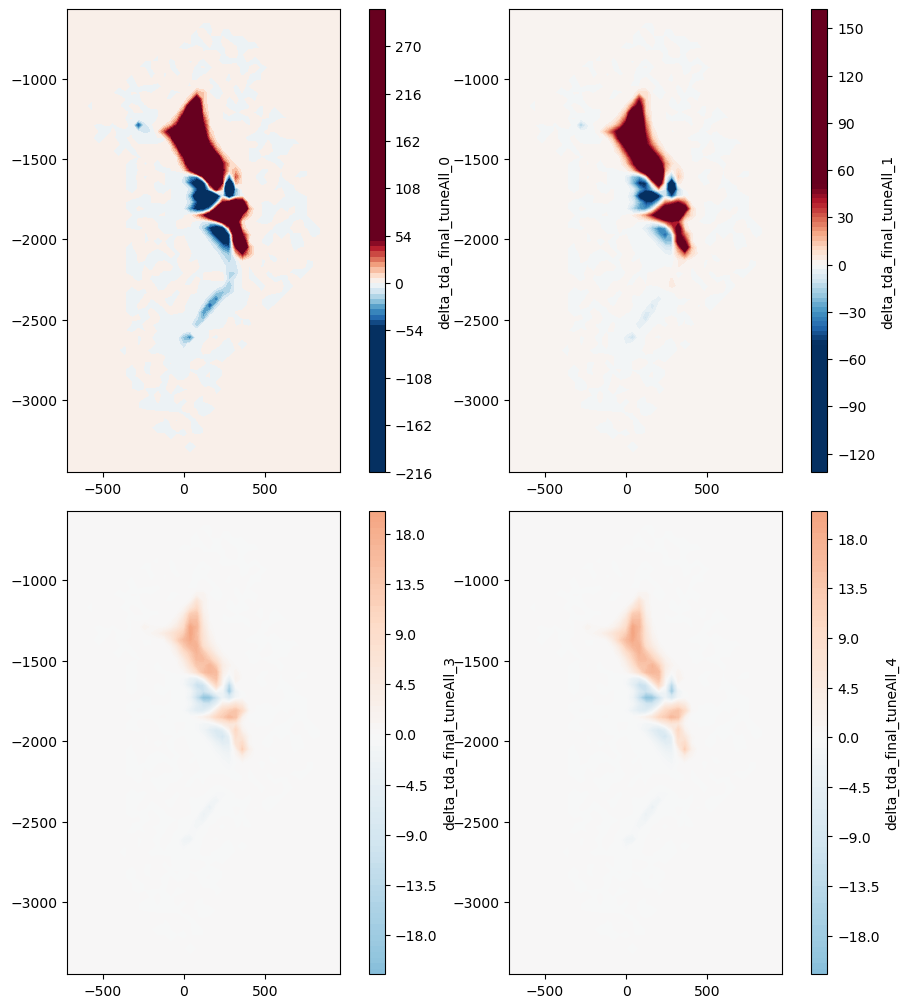

In [17]:
z_idx = 60

n_rows, n_cols = 2, 2
aspect_ratio = len(ds_tuneCS['x'])/len(ds_tuneCS['y'])
subplot_width = 3
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)
    
fancyPlotter.plot_normal(ds_tuneAll_0['x'], ds_tuneAll_0['y'], 
                         10**ds_tuneAll_0["xx_age_c"][z_idx]-10**ds_tuneAll_init["xx_age_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,0], vmin = -50, vmax = 50,
                         cbar_label = 'delta_tda_final_tuneAll_0')

fancyPlotter.plot_normal(ds_tuneAll_1['x'], ds_tuneAll_1['y'], 
                         10**ds_tuneAll_1["xx_age_c"][z_idx]-10**ds_tuneAll_init["xx_age_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,1], vmin = -50, vmax = 50,
                         cbar_label = 'delta_tda_final_tuneAll_1')

fancyPlotter.plot_normal(ds_tuneAll_3['x'], ds_tuneAll_3['y'], 
                         10**ds_tuneAll_3["xx_age_c"][z_idx]-10**ds_tuneAll_init["xx_age_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,0], vmin = -50, vmax = 50,
                         cbar_label = 'delta_tda_final_tuneAll_3')

fancyPlotter.plot_normal(ds_tuneAll_4['x'], ds_tuneAll_4['y'], 
                         10**ds_tuneAll_4["xx_age_c"][z_idx]-10**ds_tuneAll_init["xx_age_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,1], vmin = -50, vmax = 50,
                         cbar_label = 'delta_tda_final_tuneAll_4')

plt.tight_layout()

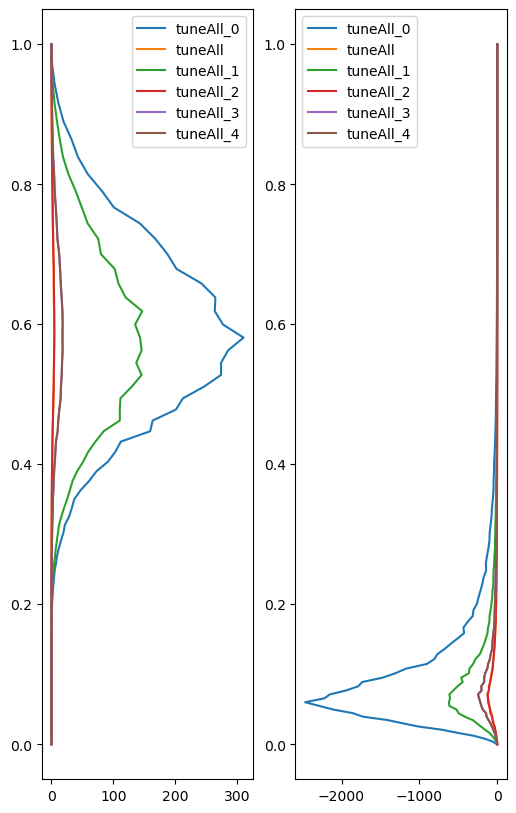

In [12]:
plt.rcParams["figure.figsize"] = (6, 10)
fig, ax = plt.subplots(1,2)
ax[0].plot(10**ds_tuneAll_0["xx_age_c"][:,50,20]-10**ds_tuneAll_init["xx_age_c"][:,50,20], ds_tuneAll_0["zeta_c"], label = "tuneAll_0")
ax[0].plot(10**ds_tuneAll["xx_age_c"][:,50,20]-10**ds_tuneAll_init["xx_age_c"][:,50,20], ds_tuneAll["zeta_c"], label = "tuneAll")
ax[0].plot(10**ds_tuneAll_1["xx_age_c"][:,50,20]-10**ds_tuneAll_init["xx_age_c"][:,50,20], ds_tuneAll_1["zeta_c"], label = "tuneAll_1")
ax[0].plot(10**ds_tuneAll_2["xx_age_c"][:,50,20]-10**ds_tuneAll_init["xx_age_c"][:,50,20], ds_tuneAll_2["zeta_c"], label = "tuneAll_2")
ax[0].plot(10**ds_tuneAll_3["xx_age_c"][:,50,20]-10**ds_tuneAll_init["xx_age_c"][:,50,20], ds_tuneAll_3["zeta_c"], label = "tuneAll_3")
ax[0].plot(10**ds_tuneAll_4["xx_age_c"][:,50,20]-10**ds_tuneAll_init["xx_age_c"][:,50,20], ds_tuneAll_4["zeta_c"], label = "tuneAll_4")
ax[0].legend()

ax[1].plot(10**ds_tuneAll_0["xx_age_c"][:,24,20]-10**ds_tuneAll_init["xx_age_c"][:,24,20], ds_tuneAll_0["zeta_c"], label = "tuneAll_0")
ax[1].plot(10**ds_tuneAll["xx_age_c"][:,24,20]-10**ds_tuneAll_init["xx_age_c"][:,24,20], ds_tuneAll["zeta_c"], label = "tuneAll")
ax[1].plot(10**ds_tuneAll_1["xx_age_c"][:,24,20]-10**ds_tuneAll_init["xx_age_c"][:,24,20], ds_tuneAll_1["zeta_c"], label = "tuneAll_1")
ax[1].plot(10**ds_tuneAll_2["xx_age_c"][:,24,20]-10**ds_tuneAll_init["xx_age_c"][:,24,20], ds_tuneAll_2["zeta_c"], label = "tuneAll_2")
ax[1].plot(10**ds_tuneAll_3["xx_age_c"][:,24,20]-10**ds_tuneAll_init["xx_age_c"][:,24,20], ds_tuneAll_3["zeta_c"], label = "tuneAll_3")
ax[1].plot(10**ds_tuneAll_4["xx_age_c"][:,24,20]-10**ds_tuneAll_init["xx_age_c"][:,24,20], ds_tuneAll_4["zeta_c"], label = "tuneAll_4")
ax[1].legend()

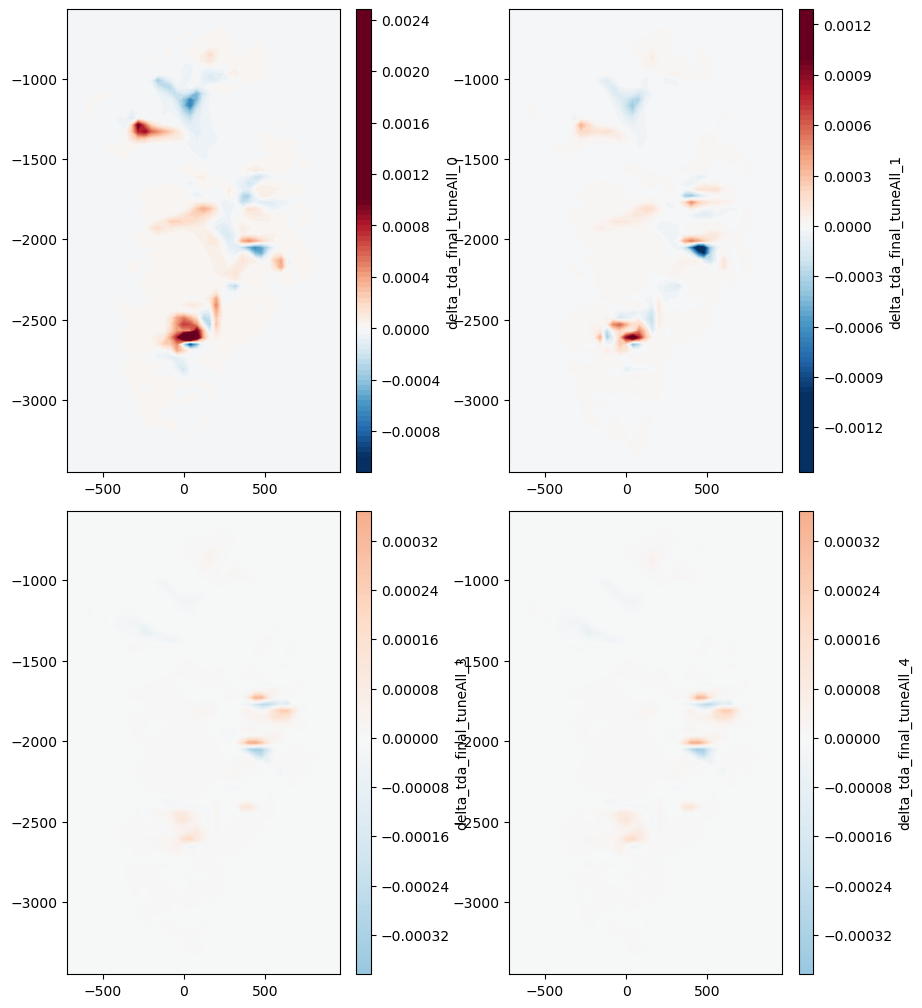

In [25]:
z_idx = 60

n_rows, n_cols = 2, 2
aspect_ratio = len(ds_tuneCS['x'])/len(ds_tuneCS['y'])
subplot_width = 3
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)
    
fancyPlotter.plot_normal(ds_tuneAll_0['x'], ds_tuneAll_0['y'], 
                         ds_tuneAll_0["xx_temp_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,0], vmin = -0.001, vmax = 0.001,
                         cbar_label = 'delta_tda_final_tuneAll_0')

fancyPlotter.plot_normal(ds_tuneAll_1['x'], ds_tuneAll_1['y'], 
                         ds_tuneAll_1["xx_temp_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[0,1], vmin = -0.001, vmax = 0.001,
                         cbar_label = 'delta_tda_final_tuneAll_1')

fancyPlotter.plot_normal(ds_tuneAll_3['x'], ds_tuneAll_3['y'], 
                         ds_tuneAll_3["xx_temp_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,0], vmin = -0.001, vmax = 0.001,
                         cbar_label = 'delta_tda_final_tuneAll_3')

fancyPlotter.plot_normal(ds_tuneAll_4['x'], ds_tuneAll_4['y'], 
                         ds_tuneAll_4["xx_temp_c"][z_idx],
                         cmap = 'RdBu_r',
                         fig = fig, ax = ax[1,1], vmin = -0.001, vmax = 0.001,
                         cbar_label = 'delta_tda_final_tuneAll_4')

plt.tight_layout()

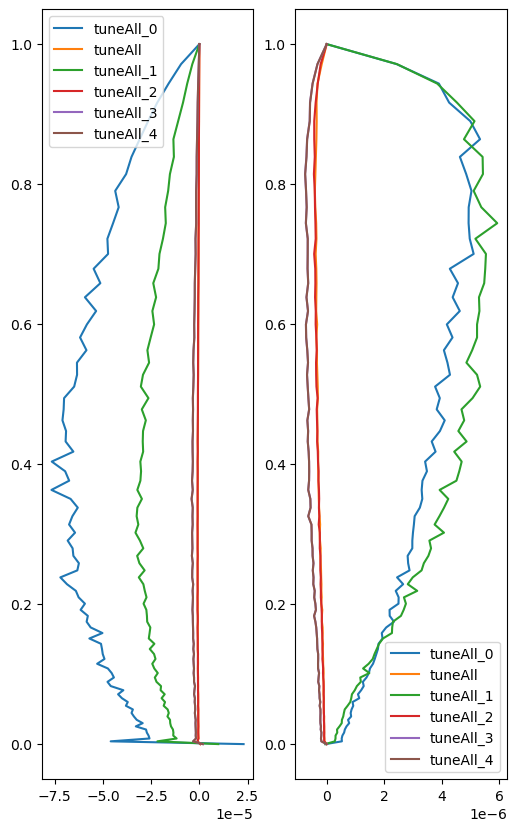

In [28]:
plt.rcParams["figure.figsize"] = (6, 10)
fig, ax = plt.subplots(1,2)
ax[0].plot(ds_tuneAll_0["xx_temp_c"][:,50,20], ds_tuneAll_0["zeta_c"], label = "tuneAll_0")
ax[0].plot(ds_tuneAll["xx_temp_c"][:,50,20], ds_tuneAll["zeta_c"], label = "tuneAll")
ax[0].plot(ds_tuneAll_1["xx_temp_c"][:,50,20], ds_tuneAll_1["zeta_c"], label = "tuneAll_1")
ax[0].plot(ds_tuneAll_2["xx_temp_c"][:,50,20], ds_tuneAll_2["zeta_c"], label = "tuneAll_2")
ax[0].plot(ds_tuneAll_3["xx_temp_c"][:,50,20], ds_tuneAll_3["zeta_c"], label = "tuneAll_3")
ax[0].plot(ds_tuneAll_4["xx_temp_c"][:,50,20], ds_tuneAll_4["zeta_c"], label = "tuneAll_4")
ax[0].legend()

ax[1].plot(ds_tuneAll_0["xx_temp_c"][:,14,18], ds_tuneAll_0["zeta_c"], label = "tuneAll_0")
ax[1].plot(ds_tuneAll["xx_temp_c"][:,14,18], ds_tuneAll["zeta_c"], label = "tuneAll")
ax[1].plot(ds_tuneAll_1["xx_temp_c"][:,14,18], ds_tuneAll_1["zeta_c"], label = "tuneAll_1")
ax[1].plot(ds_tuneAll_2["xx_temp_c"][:,14,18], ds_tuneAll_2["zeta_c"], label = "tuneAll_2")
ax[1].plot(ds_tuneAll_3["xx_temp_c"][:,14,18], ds_tuneAll_3["zeta_c"], label = "tuneAll_3")
ax[1].plot(ds_tuneAll_4["xx_temp_c"][:,14,18], ds_tuneAll_4["zeta_c"], label = "tuneAll_4")
ax[1].legend()